## Arima Model

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [354]:
# Load the data
url = "https://raw.githubusercontent.com/rittiin/healthdata/main/dataset_43file_health.csv"
df = pd.read_csv(url)
df

,year,month,week,province,disease,cases
0,2018,1,1,39,copd,125
1,2018,1,1,94,ihd,29
2,2018,1,1,75,asthma,2
3,2018,1,1,14,ihd,38
4,2018,1,1,25,copd,90
...,...,...,...,...,...,...
74900,2023,1,52,33,ihd,4
74901,2023,1,52,44,copd,18
74902,2023,1,52,80,asthma,2
74903,2023,1,52,48,ihd,7


# Convert the year and week columns to datetime format and extract year and month values

In [355]:
df["date"] = pd.to_datetime(df["year"].astype(str) + df["week"].astype(str) + "0", format="%Y%W%w")
df

,year,month,week,province,disease,cases,date
0,2018,1,1,39,copd,125,2018-01-07
1,2018,1,1,94,ihd,29,2018-01-07
2,2018,1,1,75,asthma,2,2018-01-07
3,2018,1,1,14,ihd,38,2018-01-07
4,2018,1,1,25,copd,90,2018-01-07
...,...,...,...,...,...,...,...
74900,2023,1,52,33,ihd,4,2023-12-31
74901,2023,1,52,44,copd,18,2023-12-31
74902,2023,1,52,80,asthma,2,2023-12-31
74903,2023,1,52,48,ihd,7,2023-12-31


# Filter the data for Province 50 เชียงใหม่ and ipd cases

In [356]:
# Filter the data for province 50 and COPD cases
df_copd = df.loc[(df["province"] == '50') & (df["disease"] == "ihd"), :]
df_monthly = df_copd.groupby(pd.Grouper(key="date", freq="M")).sum()["cases"].reset_index().set_index('date')
df_monthly

,cases
date,
2018-01-31,319
2018-02-28,310
2018-03-31,282
2018-04-30,323
2018-05-31,313
...,...
2023-08-31,0
2023-09-30,0
2023-10-31,0


In [359]:
### Save file to CSV
#df_monthly.to_csv('df_ipd_cm.csv')  

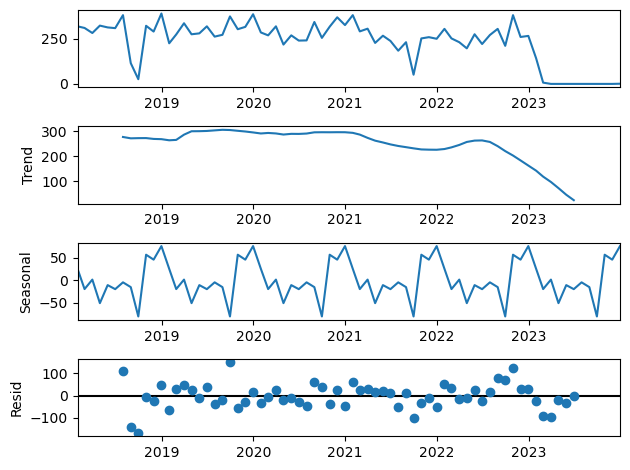

In [360]:
# Perform seasonal decomposition on the monthly data
result = seasonal_decompose(df_monthly)
result.plot()
plt.show()

# Create training and test data sets

In [315]:
train = df_monthly['2018-01-31':'2021-12-31']
test = df_monthly['2022-01-31':'2022-12-31']


In [316]:
train['cases']

date
2018-01-31    319
2018-02-28    310
2018-03-31    282
2018-04-30    323
2018-05-31    313
2018-06-30    309
2018-07-31    381
2018-08-31    115
2018-09-30     26
2018-10-31    322
2018-11-30    290
2018-12-31    390
2019-01-31    225
2019-02-28    274
2019-03-31    336
2019-04-30    275
2019-05-31    280
2019-06-30    319
2019-07-31    262
2019-08-31    272
2019-09-30    374
2019-10-31    303
2019-11-30    316
2019-12-31    386
2020-01-31    285
2020-02-29    269
2020-03-31    319
2020-04-30    218
2020-05-31    269
2020-06-30    240
2020-07-31    241
2020-08-31    343
2020-09-30    255
2020-10-31    317
2020-11-30    369
2020-12-31    326
2021-01-31    381
2021-02-28    291
2021-03-31    306
2021-04-30    227
2021-05-31    267
2021-06-30    238
2021-07-31    184
2021-08-31    231
2021-09-30     51
2021-10-31    252
2021-11-30    259
2021-12-31    250
Name: cases, dtype: int64

In [317]:
train['cases']  = np.where(train['cases'] < 200, np.mean(train['cases']) + np.std(train['cases']),train['cases'])
train

/tmp/ipykernel_16401/2559273710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cases']  = np.where(train['cases'] < 200, np.mean(train['cases']) + np.std(train['cases']),train['cases'])


,cases
date,
2018-01-31,319.0000
2018-02-28,310.0000
2018-03-31,282.0000
2018-04-30,323.0000
2018-05-31,313.0000
2018-06-30,309.0000
2018-07-31,381.0000
2018-08-31,352.3809
2018-09-30,352.3809


In [318]:
test

,cases
date,
2022-01-31,305
2022-02-28,252
2022-03-31,231
2022-04-30,197
2022-05-31,275
2022-06-30,221
2022-07-31,271
2022-08-31,305
2022-09-30,211


## Best model : ARIMA

In [326]:
import pmdarima as pm
#train_5ma = train.rolling(5,center=True).mean()[2:-2]
model = pm.auto_arima(train, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=12,             
                      d=1,          
                      seasonal=True,   
                      D=1, 
                      trace=True,
                      error_action='ignore')#,  
                      #suppress_warnings=True, 
                      #stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=420.720, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=401.202, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=406.360, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=395.925, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=415.882, Time=0.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=392.530, Time=0.26 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=394.776, Time=0.12 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=394.530, Time=0.31 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=394.530, Time=

In [338]:
#prediction = pd.DataFrame(model.predict(n_periods =12),index=test.index)
#prediction.columns = ['predicted_sales']

#plt.figure(figsize=(8,5))
#plt.plot(train,label="Training")
#plt.plot(test, label="Test")
#plt.plot(prediction,label="Predicted")#plt.show()

# ARIMA model on the training data

In [375]:
from statsmodels.tsa.arima.model import ARIMA
#model = ARIMA(train, order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
model = ARIMA(train, order=(0, 1, 1))

#model = ARIMA(train, order=(3, 1, 1),seasonal_order=(2, 1, 1, 12))
fit = model.fit()
forecast = fit.forecast(steps=len(test))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [377]:
print(forecast)

2022-01-31    287.41123
2022-02-28    287.41123
2022-03-31    287.41123
2022-04-30    287.41123
2022-05-31    287.41123
2022-06-30    287.41123
2022-07-31    287.41123
2022-08-31    287.41123
2022-09-30    287.41123
2022-10-31    287.41123
2022-11-30    287.41123
2022-12-31    287.41123
Freq: M, Name: predicted_mean, dtype: float64


# ARIMA model on the training data

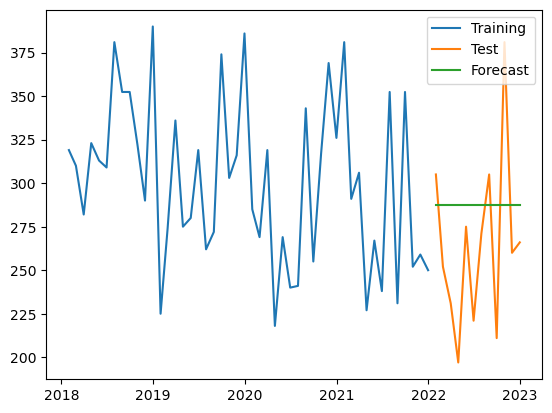

In [378]:
import matplotlib.pyplot as plt

plt.plot(train.index, train.values, label="Training")
plt.plot(test.index, test.values, label="Test")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.show()


In [379]:
df_error = pd.concat([test,forecast], axis =1)
df_error['error'] = df_error['cases'] - df_error['predicted_mean']
df_error['abs_error'] = np.abs(df_error['error'])
df_error['sum_error'] = df_error['abs_error'].sum()
df_error['mean_abs_error'] = df_error['sum_error']/len(df_error['sum_error'])
df_error['mape_each'] = df_error['abs_error']/df_error['cases']*100
df_error['mape'] = df_error['mape_each'].sum()/len(df_error)
df_error

,cases,predicted_mean,error,abs_error,sum_error,mean_abs_error,mape_each,mape
2022-01-31,305,287.41123,17.58877,17.58877,531.467379,44.288948,5.766810,17.990785
2022-02-28,252,287.41123,-35.41123,35.41123,531.467379,44.288948,14.052075,17.990785
2022-03-31,231,287.41123,-56.41123,56.41123,531.467379,44.288948,24.420446,17.990785
2022-04-30,197,287.41123,-90.41123,90.41123,531.467379,44.288948,45.894025,17.990785
2022-05-31,275,287.41123,-12.41123,12.41123,531.467379,44.288948,4.513174,17.990785
2022-06-30,221,287.41123,-66.41123,66.41123,531.467379,44.288948,30.050330,17.990785
2022-07-31,271,287.41123,-16.41123,16.41123,531.467379,44.288948,6.055804,17.990785
2022-08-31,305,287.41123,17.58877,17.58877,531.467379,44.288948,5.766810,17.990785
2022-09-30,211,287.41123,-76.41123,76.41123,531.467379,44.288948,36.213853,17.990785
2022-10-31,381,287.41123,93.58877,93.58877,531.467379,44.288948,24.563982,17.990785
